# Healthcare 🩺⚕️💪🫀👩🏻‍⚕️

## 1️⃣ Required Libraries

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## 2️⃣ Read the Dataset

In [2]:
path = r'Dataset\healthcare_dataset.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(10000, 15)

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


## 3️⃣ Exploratory Data Analysis (EDA)

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

### Description

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.452200,19.588974,18.000000,35.000000,52.000000,68.000000,85.000000
Billing Amount,10000.0,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283
Room Number,10000.0,300.082000,115.806027,101.000000,199.000000,299.000000,400.000000,500.000000


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,10000,9378,Michael Johnson,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,51.4522,19.588974,18.0,35.0,52.0,68.0,85.0
Gender,10000,2,Female,5075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,10000,8,AB-,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,10000,6,Asthma,1708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,10000,1815,2019-04-12,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,10000,9416,Michael Johnson,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,10000,8639,Smith PLC,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,10000,5,Cigna,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,10000.0,NaN,NaN,NaN,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283


### Check Columns 

In [8]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

#### Remove unnecessary columns

In [9]:
col_drop = ['Name', 'Doctor', 'Room Number', 'Hospital']
df.drop(columns=col_drop, inplace=True)

In [10]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive
1,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal
2,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal
3,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal
4,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal


#### Fix Date Columns

In [11]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%Y-%m-%d')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%Y-%m-%d')

### Check Missing Values

In [12]:
df.isna().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### Check Duplications

In [13]:
df.duplicated().sum()

0

### Univariate Analysis

#### Check Numeric Columns 

In [14]:
num_cols =df.select_dtypes(['int64', 'float64']).columns
num_cols

Index(['Age', 'Billing Amount'], dtype='object')

##### Hist + KDE

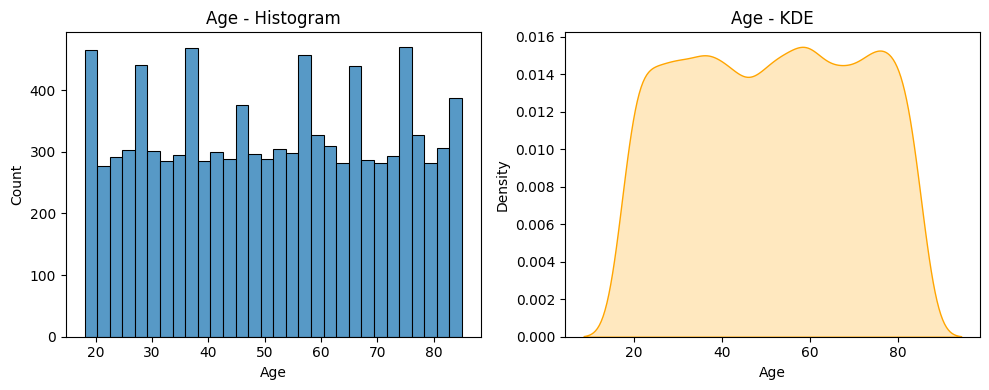

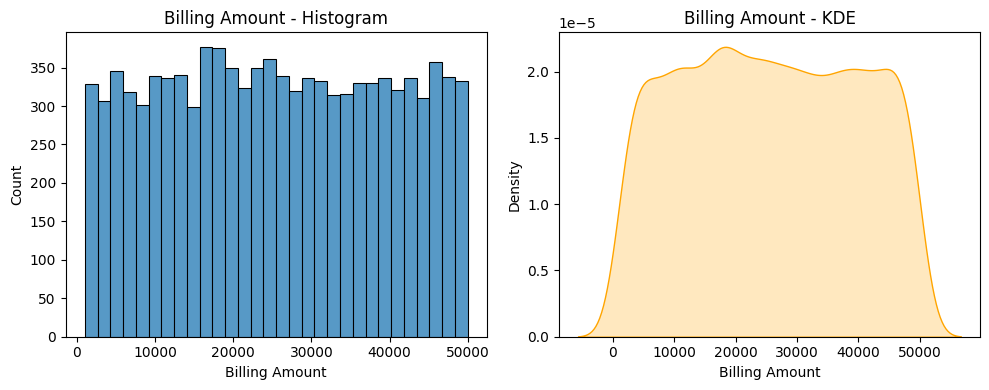

In [15]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram
    sns.histplot(df[col], bins=30, ax=axes[0])
    axes[0].set_title(f'{col} - Histogram')

    # KDE
    sns.kdeplot(df[col], fill=True, ax=axes[1], color='orange')
    axes[1].set_title(f'{col} - KDE')

    plt.tight_layout()
    plt.show()


##### Boxplot + Violinplot

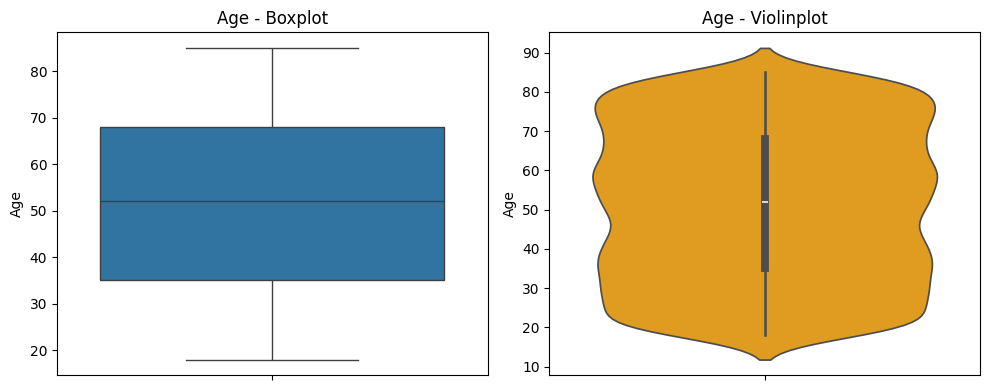

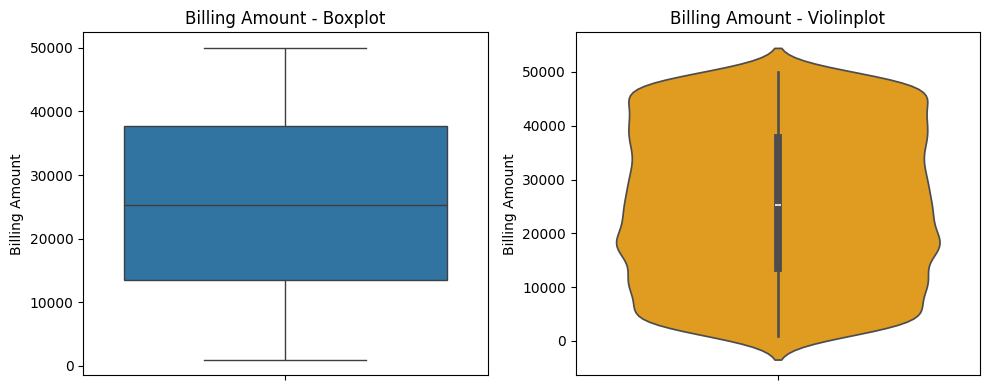

In [16]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Boxplot
    sns.boxplot(df[col], ax=axes[0])
    axes[0].set_title(f'{col} - Boxplot')

    # Violinplot
    sns.violinplot(df[col], fill=True, ax=axes[1], color='orange')
    axes[1].set_title(f'{col} - Violinplot')

    plt.tight_layout()
    plt.show()


#### Check Categorical Columns

In [17]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Admission Type', 'Medication', 'Test Results'],
      dtype='object')

In [18]:
for col in cat_cols:
    print(df[col].value_counts())
    print('\n')

Gender
Female    5075
Male      4925
Name: count, dtype: int64


Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64


Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64


Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64


Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64




C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3398846481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='Set1')


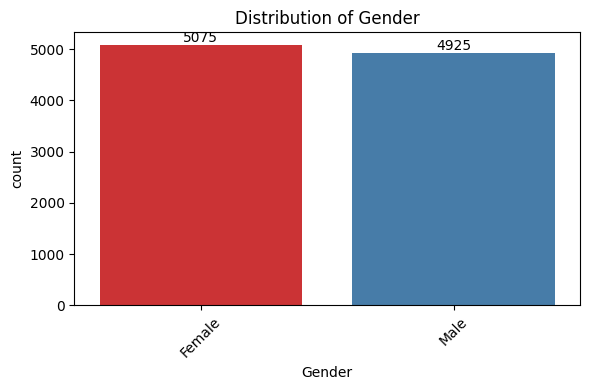

C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3398846481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='Set1')


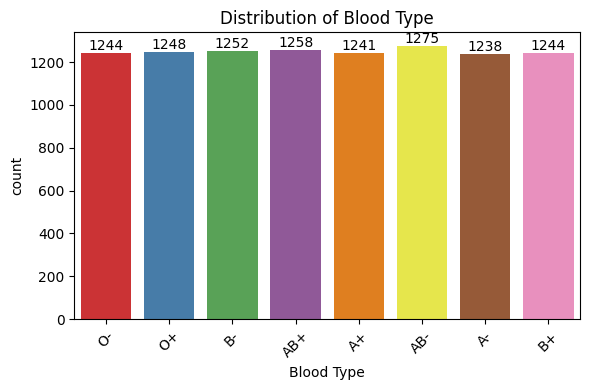

C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3398846481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='Set1')


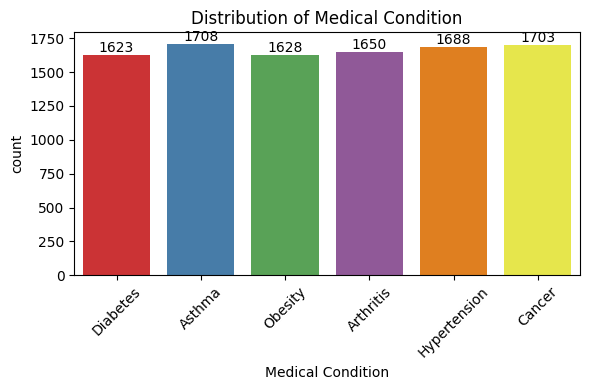

C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3398846481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='Set1')


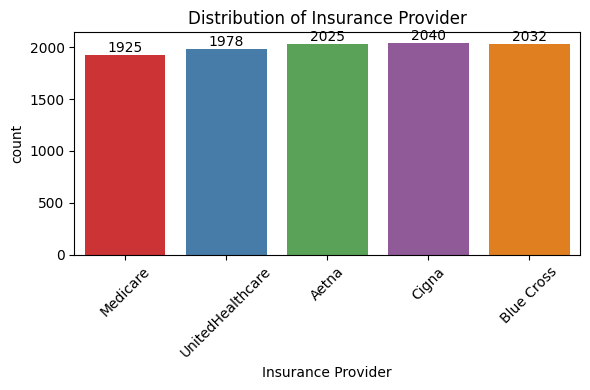

C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3398846481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='Set1')


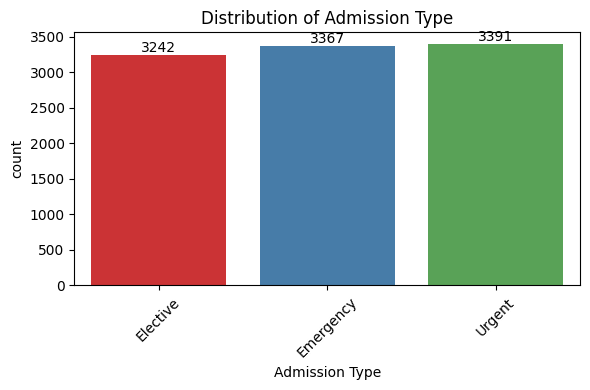

C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3398846481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='Set1')


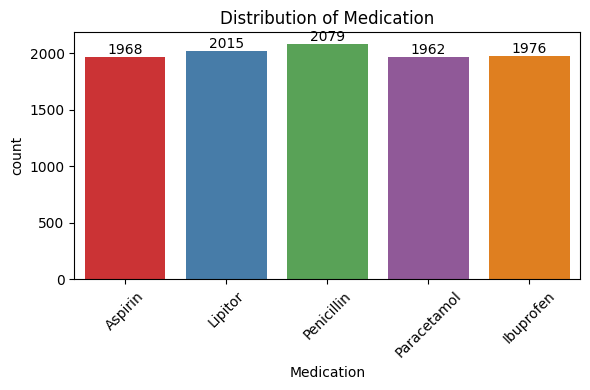

In [19]:
for col in cat_cols[:-1]:
    plt.figure(figsize=(6,4))

    ax = sns.countplot(data=df, x=col, palette='Set1')
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
            (p.get_x() + p.get_width()/2, height),ha='center', va='bottom')

    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Check Target Column

In [20]:
df['Test Results']

0       Inconclusive
1             Normal
2             Normal
3           Abnormal
4             Normal
            ...     
9995        Abnormal
9996          Normal
9997          Normal
9998          Normal
9999        Abnormal
Name: Test Results, Length: 10000, dtype: object

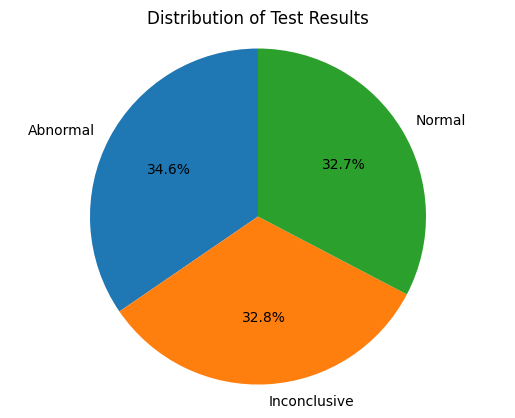

In [21]:
plt.pie(
    df['Test Results'].value_counts().values,
    labels=df['Test Results'].value_counts().index,
    autopct='%1.1f%%',     
    startangle=90,)
plt.title('Distribution of Test Results')
plt.axis('equal')  
plt.show()

### Bivariate Analysis

#### Age with Test Results

In [22]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

df['Age Group'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    right=False
)

In [23]:
data = (
    df.groupby(['Age Group', 'Test Results'])
      .size()
      .reset_index(name='count')
)

pivot = data.pivot(
    index='Age Group',
    columns='Test Results',
    values='count'
)

C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3885110494.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age Group', 'Test Results'])


<Figure size 1200x600 with 0 Axes>

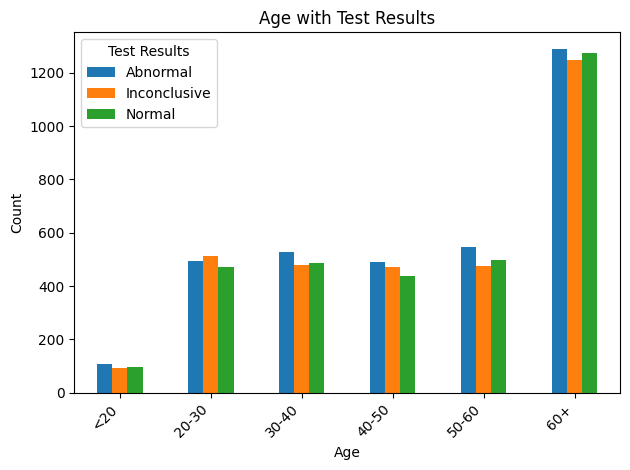

In [24]:
plt.figure(figsize=(12,6))
pivot.plot(kind='bar')
plt.title('Age with Test Results')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test Results')
plt.tight_layout()
plt.show()

In [25]:
df.drop('Age Group', axis=1, inplace=True)

#### Gender with Test Results

In [26]:
data = (
    df.groupby(['Gender', 'Test Results'])
      .size()
      .reset_index(name='count')
)

pivot = data.pivot(
    index='Gender',
    columns='Test Results',
    values='count'
)

In [27]:
pivot

Test Results,Abnormal,Inconclusive,Normal
Gender,,,
Female,1716,1696,1663
Male,1740,1581,1604


<Figure size 1200x600 with 0 Axes>

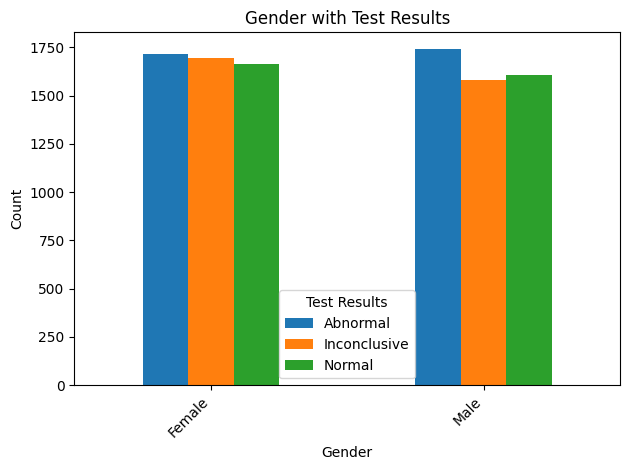

In [28]:
plt.figure(figsize=(12,6))
pivot.plot(kind='bar')
plt.title('Gender with Test Results')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test Results')
plt.tight_layout()
plt.show()

#### Medication with Test Results

In [29]:
df['Medication'].value_counts()

Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64

In [30]:
data = (
    df.groupby(['Medication', 'Test Results'])
      .size()
      .reset_index(name='count')
)

pivot = data.pivot(
    index='Medication',
    columns='Test Results',
    values='count'
)

In [31]:
pivot

Test Results,Abnormal,Inconclusive,Normal
Medication,,,
Aspirin,654,634,680
Ibuprofen,680,627,669
Lipitor,721,685,609
Paracetamol,685,651,626
Penicillin,716,680,683


<Figure size 1200x600 with 0 Axes>

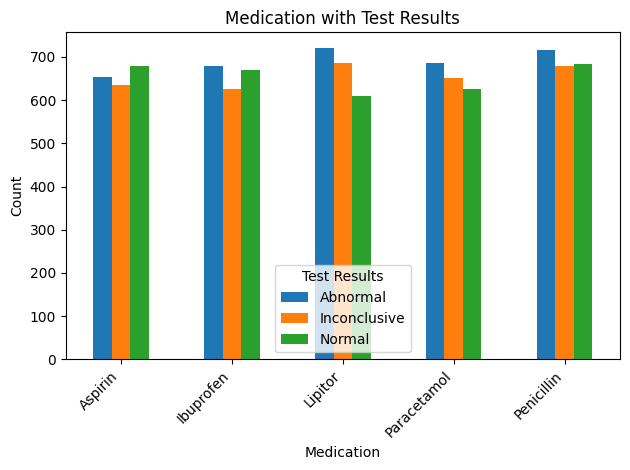

In [32]:
plt.figure(figsize=(12,6))
pivot.plot(kind='bar')
plt.title('Medication with Test Results')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test Results')
plt.tight_layout()
plt.show()

### Realations

In [33]:
insurance_costs = np.round(df.groupby('Insurance Provider')['Billing Amount'].sum(),2).reset_index()
insurance_costs['%Insurance Costs'] = np.round((insurance_costs['Billing Amount'] / df['Billing Amount'].sum() * 100),2)
display(insurance_costs)

,Insurance Provider,Billing Amount,%Insurance Costs
0,Aetna,52321794.76,20.50
1,Blue Cross,52125858.90,20.43
2,Cigna,52340171.59,20.51
3,Medicare,48129774.83,18.86
4,UnitedHealthcare,50250467.70,19.69


C:\Users\moham\AppData\Local\Temp\ipykernel_20440\503119552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Medical Condition', y='Billing Amount', estimator='mean', palette='viridis')


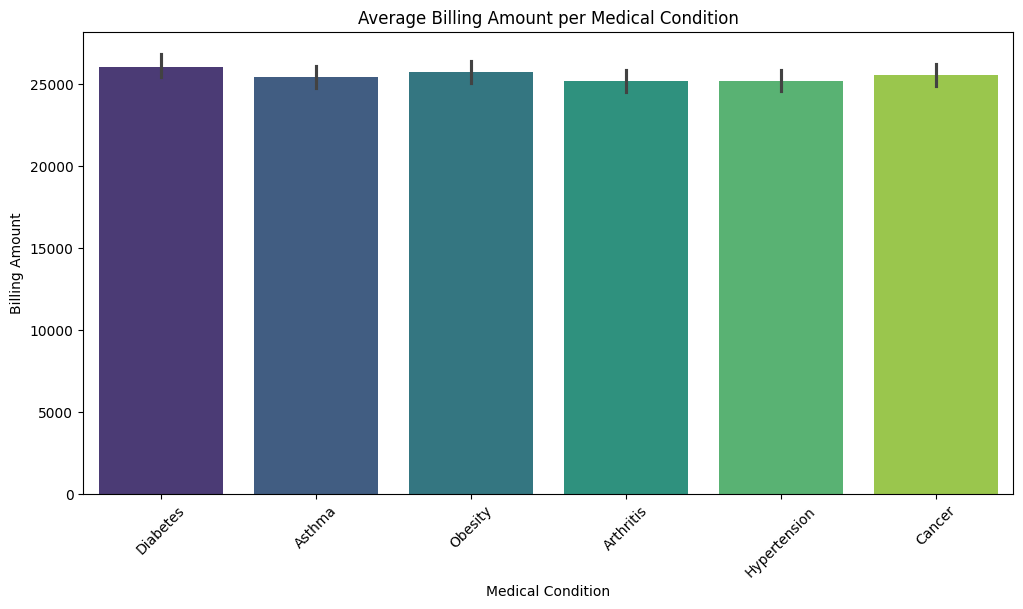

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Medical Condition', y='Billing Amount', estimator='mean', palette='viridis')
plt.title('Average Billing Amount per Medical Condition')
plt.xticks(rotation=45)
plt.show()

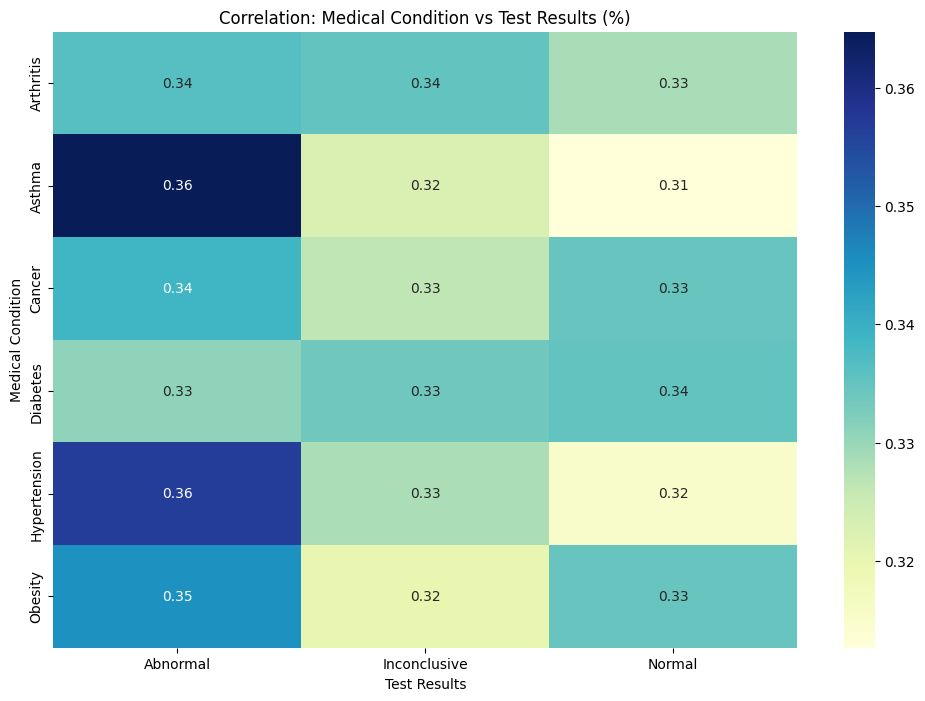

In [35]:
ct = pd.crosstab(df['Medical Condition'], df['Test Results'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(ct, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation: Medical Condition vs Test Results (%)')
plt.show()

## 4️⃣ Feature Engineering

In [36]:
df['Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [37]:
df['Stay Duration']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Stay Duration, Length: 10000, dtype: int64

### Average Hospital Stay Duration per Month

In [38]:
df['Month'] = df['Date of Admission'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
monthly_sum = df.groupby('Month')['Stay Duration'].sum().reset_index()

C:\Users\moham\AppData\Local\Temp\ipykernel_20440\3850260810.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sum = df.groupby('Month')['Stay Duration'].sum().reset_index()


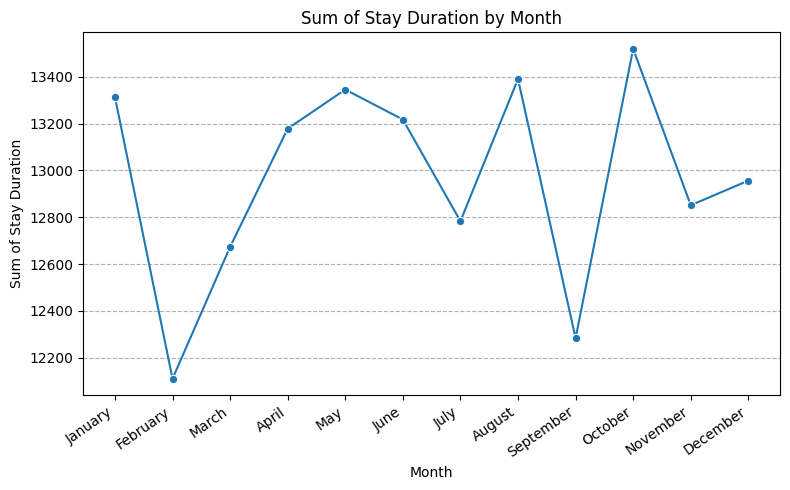

In [55]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_sum, x='Month', y='Stay Duration', marker='o')
plt.title('Sum of Stay Duration by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Stay Duration')
plt.xticks(rotation=35, ha='right', color='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [40]:
df.drop(['Date of Admission', 'Discharge Date', 'Month'], axis=1, inplace=True)

## 5️⃣ Data Transformation

In [41]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Stay Duration
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


In [42]:
cols =  ['Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', 
         'Medication', 'Test Results', 'Gender']

le = LabelEncoder()
for col in cols :
    df[col] = le.fit_transform(df[col])

In [43]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Stay Duration
0,81,0,7,3,3,37490.983364,0,0,1,14
1,35,1,6,1,4,47304.064845,1,2,2,14
2,61,1,5,5,3,36874.896997,1,2,2,30
3,49,1,5,1,3,23303.322092,2,4,0,1
4,51,1,7,0,4,18086.344184,2,3,2,24


## 6️⃣ Split Data into Features and Target 

In [44]:
X = df.drop(columns=['Test Results'])
y = df['Test Results']

## 7️⃣ Split Data into Train and Test Sets 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
X_train.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Stay Duration
9254,19,1,1,3,4,20629.373432,1,2,25
1561,37,1,0,4,0,46635.084208,1,2,21
1670,22,0,4,2,4,3361.701810,2,3,5
6087,67,0,2,4,3,39014.160066,2,0,15
6669,38,0,7,4,3,48390.969134,0,4,12


In [47]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [48]:
X_train

array([[-1.66394501,  1.02327069, -1.1006112 , ..., -0.02134558,
        -0.01904068,  1.09303231],
       [-0.74468775,  1.02327069, -1.53860004, ..., -0.02134558,
        -0.01904068,  0.62815945],
       [-1.51073547, -0.97725852,  0.21335531, ...,  1.20717687,
         0.6861697 , -1.23133199],
       ...,
       [ 1.50238555,  1.02327069,  0.65134415, ..., -0.02134558,
        -1.42946143, -0.06914984],
       [-0.33612897, -0.97725852, -0.22463353, ..., -0.02134558,
        -1.42946143,  0.74437767],
       [ 1.19596646,  1.02327069,  0.65134415, ..., -1.24986803,
        -0.72425106, -0.30158627]])

## 8️⃣ Modeling

### Logistic regression

In [49]:
log_model = LogisticRegression(
    max_iter=1000,          
    class_weight='balanced',  
    solver='lbfgs',
    random_state=42
)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
print("\n--- Logistic Regerssion Results ---")

y_pred = log_model.predict(X_test)
print("Performance:\n", classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


--- Logistic Regerssion Results ---
Performance:
               precision    recall  f1-score   support

           0       0.35      0.32      0.33       706
           1       0.30      0.37      0.33       636
           2       0.34      0.30      0.32       658

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000

Accuracy: 0.328


### Random Forest 

In [51]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [52]:
print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


--- Random Forest Results ---
Accuracy: 0.339

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.38      0.37       706
           1       0.31      0.31      0.31       636
           2       0.36      0.31      0.33       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000



### SVM

In [53]:
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [54]:
print("\n--- SVM (SVC) Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


--- SVM (SVC) Results ---
Accuracy: 0.328

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.50      0.41       706
           1       0.30      0.26      0.28       636
           2       0.31      0.21      0.25       658

    accuracy                           0.33      2000
   macro avg       0.32      0.32      0.31      2000
weighted avg       0.32      0.33      0.32      2000



### 📌 Final Notes on the Dataset and Model Performance

It is important to highlight that this dataset is **synthetic**, meaning it was artificially generated and does not represent real patient data.  
The dataset was created for **educational and experimental purposes**, allowing users to practice data analysis and machine learning techniques without privacy or ethical concerns.

Due to the synthetic nature of the data:
- Feature–target relationships are not necessarily strong or realistic
- A significant amount of **noise** is intentionally present
- Class overlap makes the prediction task more challenging

As a result, achieving an **accuracy of around 30%** is both reasonable and expected.  
Attempting to significantly push the accuracy beyond this point may lead to **overfitting** rather than genuine model improvement.

Therefore, the primary objective of this project is not maximizing accuracy,  
but rather **understanding the data, experimenting with different models, and correctly interpreting the results**,  
which aligns with the intended purpose of using synthetic datasets.


## Thank You 🎀🫶🏻💌